In [131]:
#importing all the nescessory libraries we need for our analysis
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
#this variable will store the database of tmdb movies into a dataframe
movie_data = pd.read_csv('tmdb-movies.csv')

In [132]:
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [133]:
movie_data.shape

(10866, 21)

In [134]:
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## DATA CLEANING

First, lets clean up the columns.
We will only keep the columns we need and remove the rest of them.

Columns to delete -  `id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.`

In [135]:
del_cols= [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

movie_data.drop(del_cols, axis=1, inplace=True)

movie_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


Cleaning any duplicate data row

In [136]:
movie_data.drop_duplicates(keep = 'first', inplace = True)

In [137]:
movie_data.shape

(10865, 10)

Replacing the '0' values in budget and revenue column with NaN and deleting all the rows with NaN budget or revenue

In [138]:
#giving list of column names that needs to be checked
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

In [139]:
movie_data.shape

(3854, 10)

## DATA WRANGLING

**Replacing 0 with NaN of runtime column of the dataframe**

In [140]:
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)
movie_data[movie_data['runtime'].isnull()]['runtime'].sum()

0

**Now we need to convert the 'release_date' column to date format**

In [141]:
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

In [142]:
movie_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

**Changing the dataTypes of the columns to the appropriate ones**

In [143]:
change_coltype = ['budget', 'revenue']
movie_data[change_coltype] = movie_data[change_coltype].astype('int64')

**Renaming the columns of budget and revenue**

In [144]:
movie_data.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)
movie_data.head()

,budget_(in_US-Dollars),revenue_(in_US-Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


### Inserting new column profit_(in_US_Dollars) at position 2 with respect to columns which contains the value of the profit = revenue-budget

In [145]:
movie_data.insert(2, 'profit_(in_US_Dollars)', movie_data['revenue_(in_US-Dollars)'] - movie_data['budget_(in_US-Dollars)'])
movie_data['profit_(in_US_Dollars)'] = movie_data['profit_(in_US_Dollars)'].astype('int64')

In [146]:
movie_data.head()

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


## QUESTIONS

**Definig the fuction to get the highest and the lowest values in the respective columsn of the data**

In [147]:
def highest_lowest(column_name):
    
    highest_id = movie_data[column_name].idxmax()
    highest_details = pd.DataFrame(movie_data.loc[highest_id])
    
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1, names=["Details", "Highest", 'Lowest'])
    
    return two_in_one_data


### Q1. Which movie earns the most and least profit?

In [148]:
highest_lowest('profit_(in_US_Dollars)')

,1386,2244
budget_(in_US-Dollars),237000000,425000000
revenue_(in_US-Dollars),2781505847,11087569
profit_(in_US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Q2. Which movie has the longest and shortest runtime?

In [149]:
highest_lowest('runtime')

,2107,5162
budget_(in_US-Dollars),18000000,10
revenue_(in_US-Dollars),871279,5
profit_(in_US_Dollars),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Q3. Which movie has the highest and the lowest budget?

In [150]:
highest_lowest('budget_(in_US-Dollars)')

,2244,2618
budget_(in_US-Dollars),425000000,1
revenue_(in_US-Dollars),11087569,100
profit_(in_US_Dollars),-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Q4. Which movie has the highest and the lowest Revenue?

In [151]:
highest_lowest('revenue_(in_US-Dollars)')

,1386,5067
budget_(in_US-Dollars),237000000,6000000
revenue_(in_US-Dollars),2781505847,2
profit_(in_US_Dollars),2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


**Creating the function to calculate the mean of a specific of column**

In [152]:
def average_func(column_name):
    
    return movie_data[column_name].mean()

In [153]:
average_func('runtime')

109.22029060716139

### Creating a histogram plot for runtime of the movies

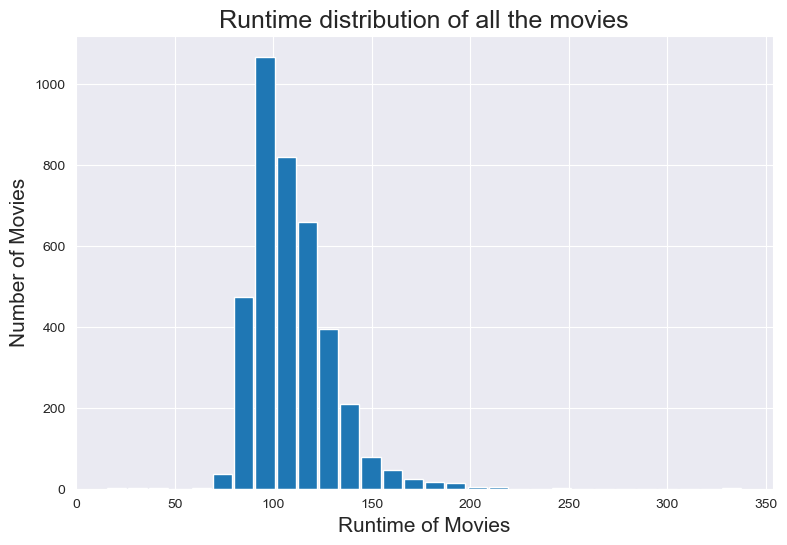

In [154]:
sns.set_style('darkgrid')
#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(movie_data['runtime'], rwidth =0.9, bins =30)
#displays the plot
plt.show()

### Creating a Box Plot for further analysis

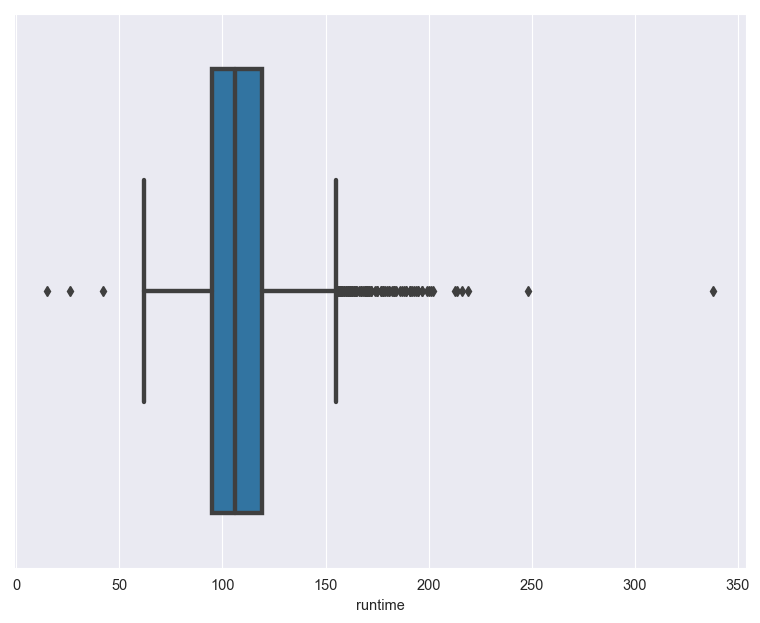

In [155]:
plt.figure(figsize=(9,7), dpi = 105)
sns.boxplot(movie_data['runtime'], linewidth = 3)
plt.show()

**Plotting the data points on the graph**

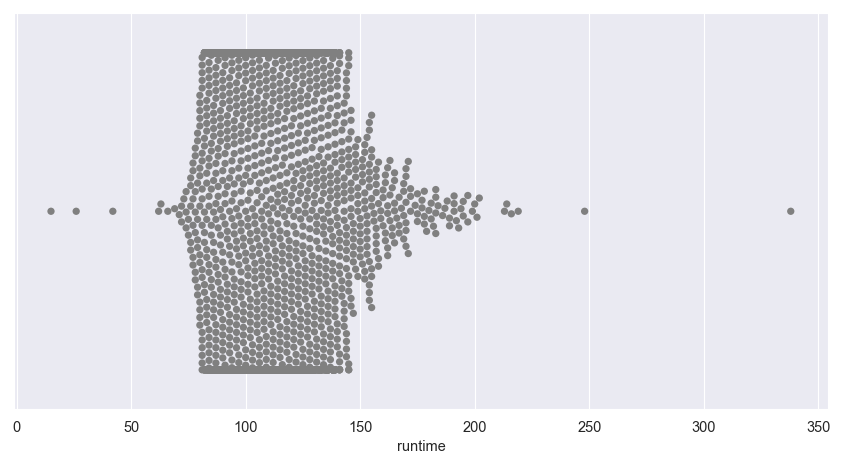

In [156]:
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(movie_data['runtime'], color = 'grey')
plt.show()

In [157]:
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Creating a plot showing the profit made by the movies w.r.t. to release years of the movies

In [158]:
#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = movie_data.groupby('release_year')['profit_(in_US_Dollars)'].sum()


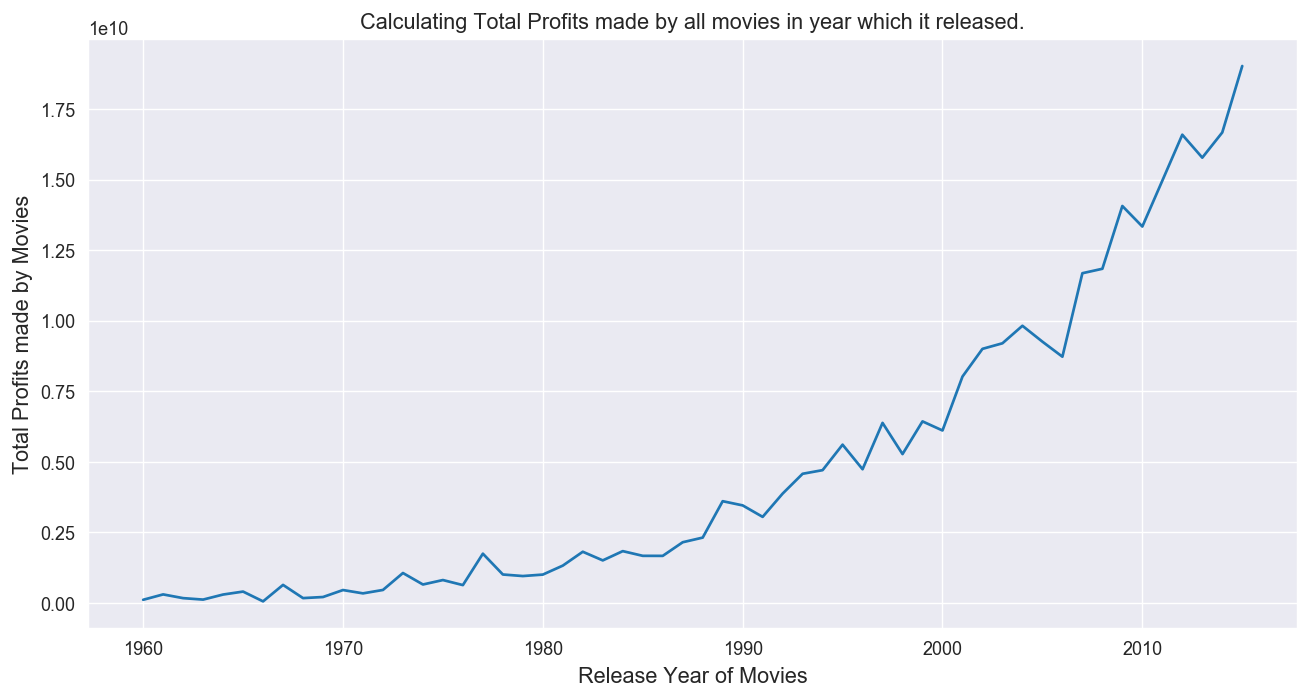

In [159]:
fig=plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Calculating Total Profits made by all movies in year which it released.')
plt.plot(profits_each_year)
plt.show()


### Creating a plot showing the Number of movies released w.r.t. to release years of the movies

In [160]:
#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
movies_released_peryear = movie_data.groupby('release_year')['original_title'].count()

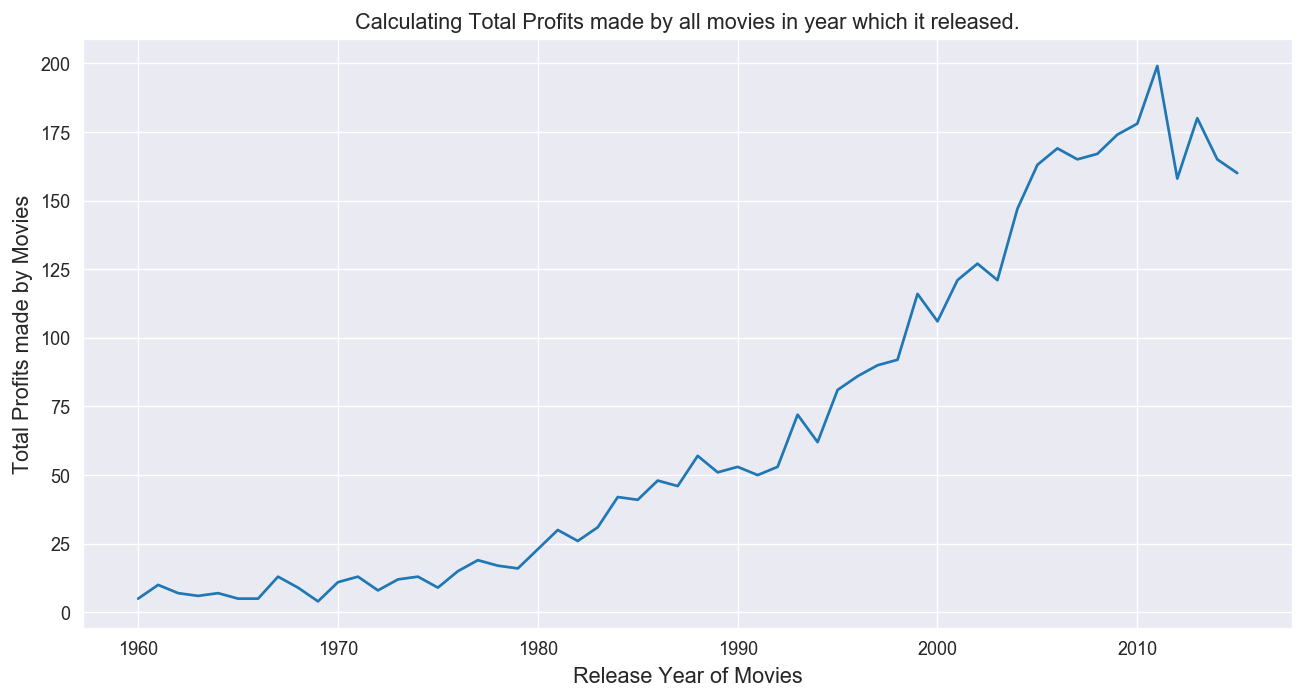

In [161]:
fig=plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Calculating Total Profits made by all movies in year which it released.')
plt.plot(movies_released_peryear)
plt.show()


In [162]:
profits_each_year=pd.DataFrame(profits_each_year)

In [163]:
profits_each_year.tail(10)

,profit_(in_US_Dollars)
release_year,
2006,8726299999
2007,11686103667
2008,11843373159
2009,14069305071
2010,13341222037
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357


In [164]:
movies_released_peryear=pd.DataFrame(movies_released_peryear)

In [165]:
movies_released_peryear.tail(10)

,original_title
release_year,
2006,169
2007,165
2008,167
2009,174
2010,178
2011,199
2012,158
2013,180
2014,165


In [166]:
id=profits_each_year.idxmax()
id

profit_(in_US_Dollars)    2015
dtype: int64

**Only those movies which made profits more than 50 million**

In [167]:
profit_movie_data = movie_data[movie_data['profit_(in_US_Dollars)'] >= 50000000]

profit_movie_data.index = range(len(profit_movie_data))
profit_movie_data.index = profit_movie_data.index + 1

profit_movie_data.head()

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [168]:
def profit_avg_fun(column):
    return profit_movie_data[column].mean()

In [169]:
profit_avg_fun('runtime')

113.66741405082212

In [170]:
profit_avg_fun('budget_(in_US-Dollars)')

60444957.76083707

In [171]:
profit_movie_data['director'].value_counts().head(10)

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          10
Tony Scott          10
Ron Howard          10
Ridley Scott        10
Michael Bay          9
David Fincher        8
Roland Emmerich      8
Name: director, dtype: int64

In [172]:
def extract_data(column_name):
    
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    all_data = pd.Series(all_data.split('|'))
    
    return all_data.value_counts(ascending = False)

In [173]:
extract_data('director').head(10)

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ron Howard          10
Tony Scott          10
Ridley Scott        10
Michael Bay          9
Roland Emmerich      8
David Fincher        8
dtype: int64

In [174]:
extract_data('cast').head(50)

Tom Cruise               27
Brad Pitt                25
Tom Hanks                22
Sylvester Stallone       21
Cameron Diaz             20
Denzel Washington        19
Adam Sandler             19
Harrison Ford            19
Robert De Niro           19
Bruce Willis             19
Jim Carrey               19
Eddie Murphy             18
Matt Damon               18
Ben Stiller              18
Johnny Depp              17
Will Smith               17
Arnold Schwarzenegger    17
Samuel L. Jackson        17
Nicolas Cage             16
Robin Williams           16
Ralph Fiennes            16
Mel Gibson               15
Gary Oldman              15
Sandra Bullock           15
Liam Neeson              15
Julia Roberts            15
Dwayne Johnson           14
Morgan Freeman           14
Mark Wahlberg            14
Anne Hathaway            14
Steve Carell             14
Sean Connery             14
Owen Wilson              14
Angelina Jolie           14
Antonio Banderas         13
Leonardo DiCaprio   

In [175]:
extract_data('genres').head(10)

Comedy             492
Drama              481
Action             464
Thriller           405
Adventure          379
Family             229
Romance            215
Science Fiction    206
Fantasy            201
Crime              193
dtype: int64

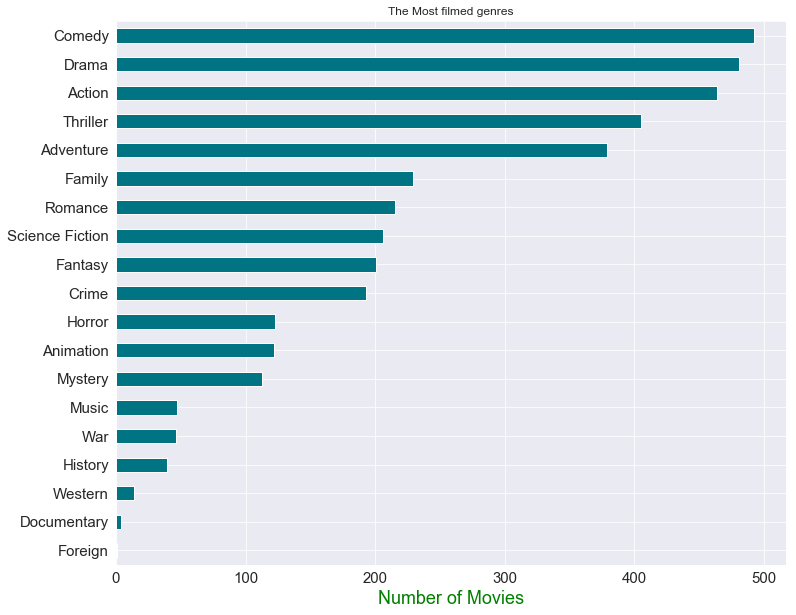

In [176]:
genre_count=extract_data('genres')

#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

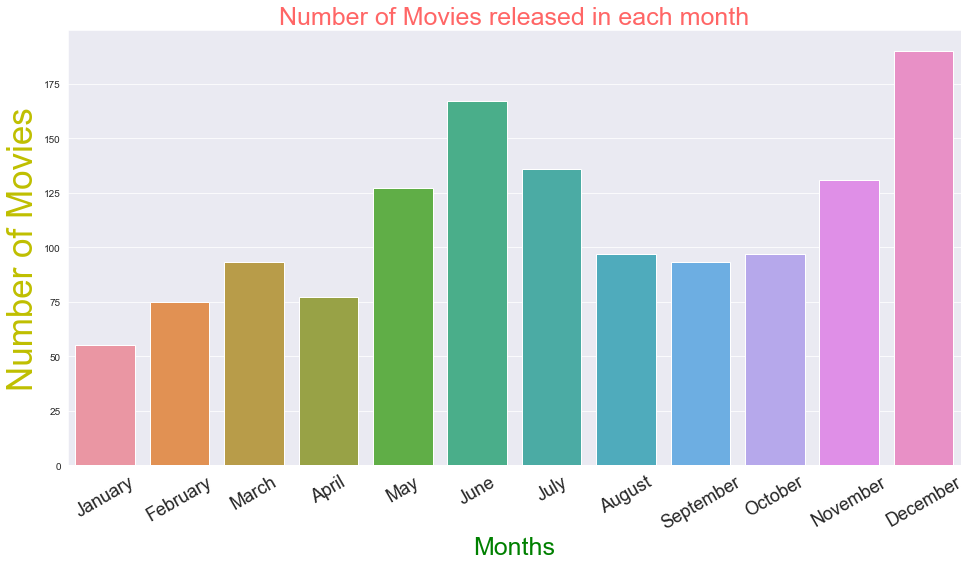

In [177]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_movie_data.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['profit_(in_US_Dollars)'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['profit_(in_US_Dollars)'], data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(16,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)

#customizing axes values
# monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

In [178]:
monthly_movie_count

,profit_(in_US_Dollars)
release_date,
1,55
2,75
3,93
4,77
5,127
6,167
7,136
8,97
9,93


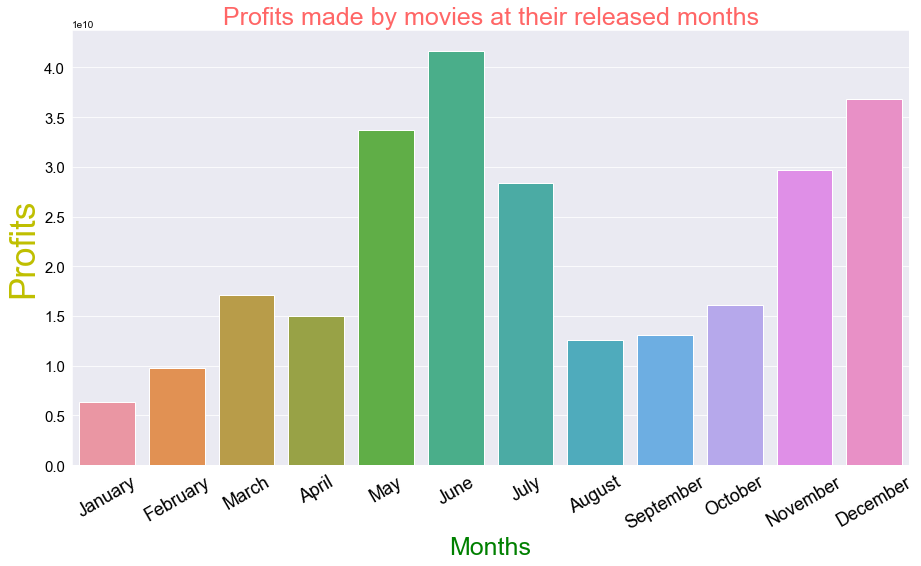

In [179]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit_(in_US_Dollars)' values to respective months, saving all this to a new var
monthly_profit = groupby_index['profit_(in_US_Dollars)'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit_(in_US_Dollars)'], data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

**CONCLUSION**

From the analysis we have done we can deduce many kind of inferences from it such as the best genre of the movie which is most famous among the audience, the best actors and actresses to be cast to make a movie a blockbuster hit, the best directors with the best direction skills and the most suitable months to release a movie.